# Project 2

### Scientific Question: Are mice such good animal models for diabetes because the insulin receptor substrate-1 gene (IRS1) is similar between mice and humans?

The insulin receptor substrate-1 (IRS1) gene is responsible for coding for the IRS1, a substrate of insulin receptor tyrosine kinase, and is phosphorylated in the signal transduction pathway for insulin. IRS1 gene mutations have been studied as a possible source of diabetes type 2 and insulin resistance (Kovacs et al., 2003).

There has been lots of research done on this gene due to its possible relation to diabetes. Rodents, especially mice, are generally used as animal models for diabetes research but information about IRS1 has also been found in humans and other animals such as zebrafish. Sequences for the IRS1 protein in humans, mice, rats, and zebrafish were taken from the National Center for Biotechnology Information (NCBI). The NCBI compiles biological and genomic data and information, and, in the case of IRS1, provides sequences of IRS1 extracted from research regarding the protein (https://www.ncbi.nlm.nih.gov/). Similarly, the Protein Data Bank (PDB) contains 3D structures of proteins, nucleic acids, and other assemblies (https://www.rcsb.org/).

### Scientific Hypothesis: If IRS1 is a probable gene for causing type 2 diabetes and mice and humans have similar endocrine systems, then the IRS1 protein sequence and structure between the two animals will be very similar.

The first measure of similarity between mice and human IRS1 genes was to compare their protein sequences because similar proteins would have similar sequences. Thus, pairwise sequencing alignment (PSA) was the first bioinformatics performed on IRS1 sequences on mice, humans, rats, and zebrafish. IRS1 protein sequences for these animals were found on NCBI and compared using PSA. Rat sequence was included because rats are also used in diabetes research. Zebrafish sequence was included because they are not generally used in diabetes research and it can provide a contrast against the similarity between human IRS1 and rodent IRS1.

This was visualized by creating a heatmap of all the alignment scores.

Another way to compare the IRS1 protein in the two organisms is to physically view the differences in the structures. This is done through my second bioinformatics method, structural bioinformatics. The 3D structures of the two proteins were found on PDB and rendered into Jupyter Notebook using the nglview package. 

The 3D structures were analyzed by taking measurements of the 3D structures and comparing those measurements. 

### Loading in Packages 

biopython: This is a package that includes many modules that are used in bioinformatics. These bioinformatics modules are mainly focused on computational molecular biology. These tools include subpackages and submodules for pairwise sequencing and protein structure analysis. They take a range of inputs depending on the subpackage or module used. Learn more on their GitHub: https://github.com/biopython/biopython

numpy: This package is a library for Python. Its main purpose is for working with arrays. These arrays are faster and easier to work with than arrays. The package also has other functions that manipulate these arrays to make computation easier. To learn more about it, look here: https://numpy.org/doc/stable/ 

pandas: This is another library that is used for data analysis and data manipulation. It does this by allowing users to manipulate and clean data sets. The important part of pandas is that it allows users to analyze large data sets. It also makes the output of the datasets easier to read. Learn more here: https://pandas.pydata.org/docs/

seaborn: This is a package that helps with data visualization. It is based on another visualization package called Matplotlib. The graphs from this package take in a pandas dataframe as an input to create their graphs. Their graphs are visually and aesthetically appealing. Learn more on their GitHub: https://github.com/mwaskom/seaborn

matplotlib: This is another package that deals with visualizing data. The graphics are not as aesthetic as some other packages such as seaborn, but it works well with numpy and pandas. It can work with large datasets and produce readable graphs. It is used here together with seaborn. Learn more here: https://matplotlib.org/stable/index.html

nglview: This is a package is also used for visualization. However, this deals with the visualization of molecular structures. While other visualization packages, such as seaborn and matplotlib, create 2D outputs, nglview creates a 3D representation of a structure. This package takes in a file as an input instead of a dataset. Learn more on their GitHub: https://github.com/nglviewer/nglview

In [1]:
# run the below lines in a terminal to install the packages

# conda install -c conda-forge biopython
# conda install -c anaconda numpy
# conda install -c anaconda pandas
# conda install -c anaconda seaborn
# conda install -c conda-forge matplotlib
# conda install -c conda-forge nglview

In [2]:
# Import libraries
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import SeqIO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import nglview as nv
from Bio.PDB import *

### Performing Bioinformatics Analysis

#### Pairwise Sequencing Alignment (PSA)

The first bioinformatics method will be pairwise sequencing alignment. The sequences taken from NCBI are FASTA files. FASTA files contain the description of the sequences, such as the organism and protein, and a string of letters, which is the sequence. Four FASTA files, each containing a sequence from different organisms, is read and the sequence is extracted from the fasta file. The sequences are then compared to one another through PSA which generates scores for each alignment based on the number of matches, gaps, and mismatches between sequences. 

In [3]:
# main purpose of SeqIO is to take sequences as inputs and output them as a specific object called SeqRecord
# it reads in sequences files of varying formats and outputs them as the SeqRecord object

# define global variables mice (FASTA file as a list), miceA (sequence from FASTA file)
mice = list(SeqIO.parse("sequence (6).fasta", "fasta")) #load in the fasta file
miceA = mice[0].seq #isolate the sequence from the fasta file

#repeat for each organism / fasta file
# define global variables hum (FASTA file as a list), humA (sequence from FASTA file)
human = list(SeqIO.parse("sequence (7).fasta", "fasta"))
humA = human[0].seq

# define global variables rat (FASTA file as a list), ratA (sequence from FASTA file)
rat = list(SeqIO.parse("sequence (8).fasta", "fasta"))
ratA = rat[0].seq

# define global variables fish (FASTA file as a list), fishA (sequence from FASTA file)
fish = list(SeqIO.parse("E7F4P8.fasta", "fasta"))
fishA = fish[0].seq

# # this is a code check 
# # uncomment below lines
# print(miceA)
# print(humA)
# print(ratA)
# print(fishA)

# create a function that will conduct PSA on given sequences and then display the alignment dictated by the 'display' argument
# this is so that the many sequences can be compared without repeating lines of code
def psa_and_display(seq1, seq2, display='summary'):
    """Conduct PSA between two given sequences and display results."""
    #define local variable alignment (PSA between two sequences)
    alignment = pairwise2.align.globalxx(seq1, seq2)
    
    if display == 'summary':  # show the alignment score, sequences, the start and end 
        for match in alignment:
            return match
        
    elif display == 'match': # change the output format the visualize sequence matches, mismatches, and gaps
        for a in alignment:
            return format_alignment(*a)

# call the 'psa_and_display()' function so that you compare each sequence against the human sequence
#define global variables psa_mice (mice PSA output), psa_rat (rat PSA output), psa_fish (fish PSA output)
psa_mice = psa_and_display(humA, miceA)
psa_rat = psa_and_display(humA, ratA)
psa_fish = psa_and_display(humA, fishA, display='match') # I changed the display to show the other printout format

# # uncomment the printout lines below to show the alignment
# print(psa_mice)
# print(psa_rat)
# print(psa_fish)

#### Structural Bioinformatics

The second bioinformatics method is called structural bioinformatics. This uses PDB files that contain the known structure of the protein or molecule the user wants to look at. The PDB files are read into the nglview package and customized so that major parts of the structures are highlighted. Here, a color scheme is used to show the different secondary structure so that the alpha-helices are shown in pink and the beta sheets are shown in yellow. Once the structures are customized, am image of the structures is saved and displayed. 

In [4]:
# import the human and mouse files and assign them to separate variables so you can call them independently
#define global variables human (human IRS1 structure file), mice (mice IRS1 structure file)
human = nv.show_structure_file('human.pdb')
mice = nv.show_structure_file('mice.pdb')

# #this is a code check
# # uncomment a structure below to see it since they can only be seen once at a time
# human 
# mice

In [5]:
human.clear_representations() # remove all default representation for the structure

#add a ribbon structure with one of the package's availble color scheme
# this specific color scheme highlights different secondary structures
human.add_ribbon(color_scheme="sstruc")

# this is a code check
human

NGLWidget()

In [25]:
# save the image exactly as positioned above
human.render_image()

Image(value=b'', width='99%')

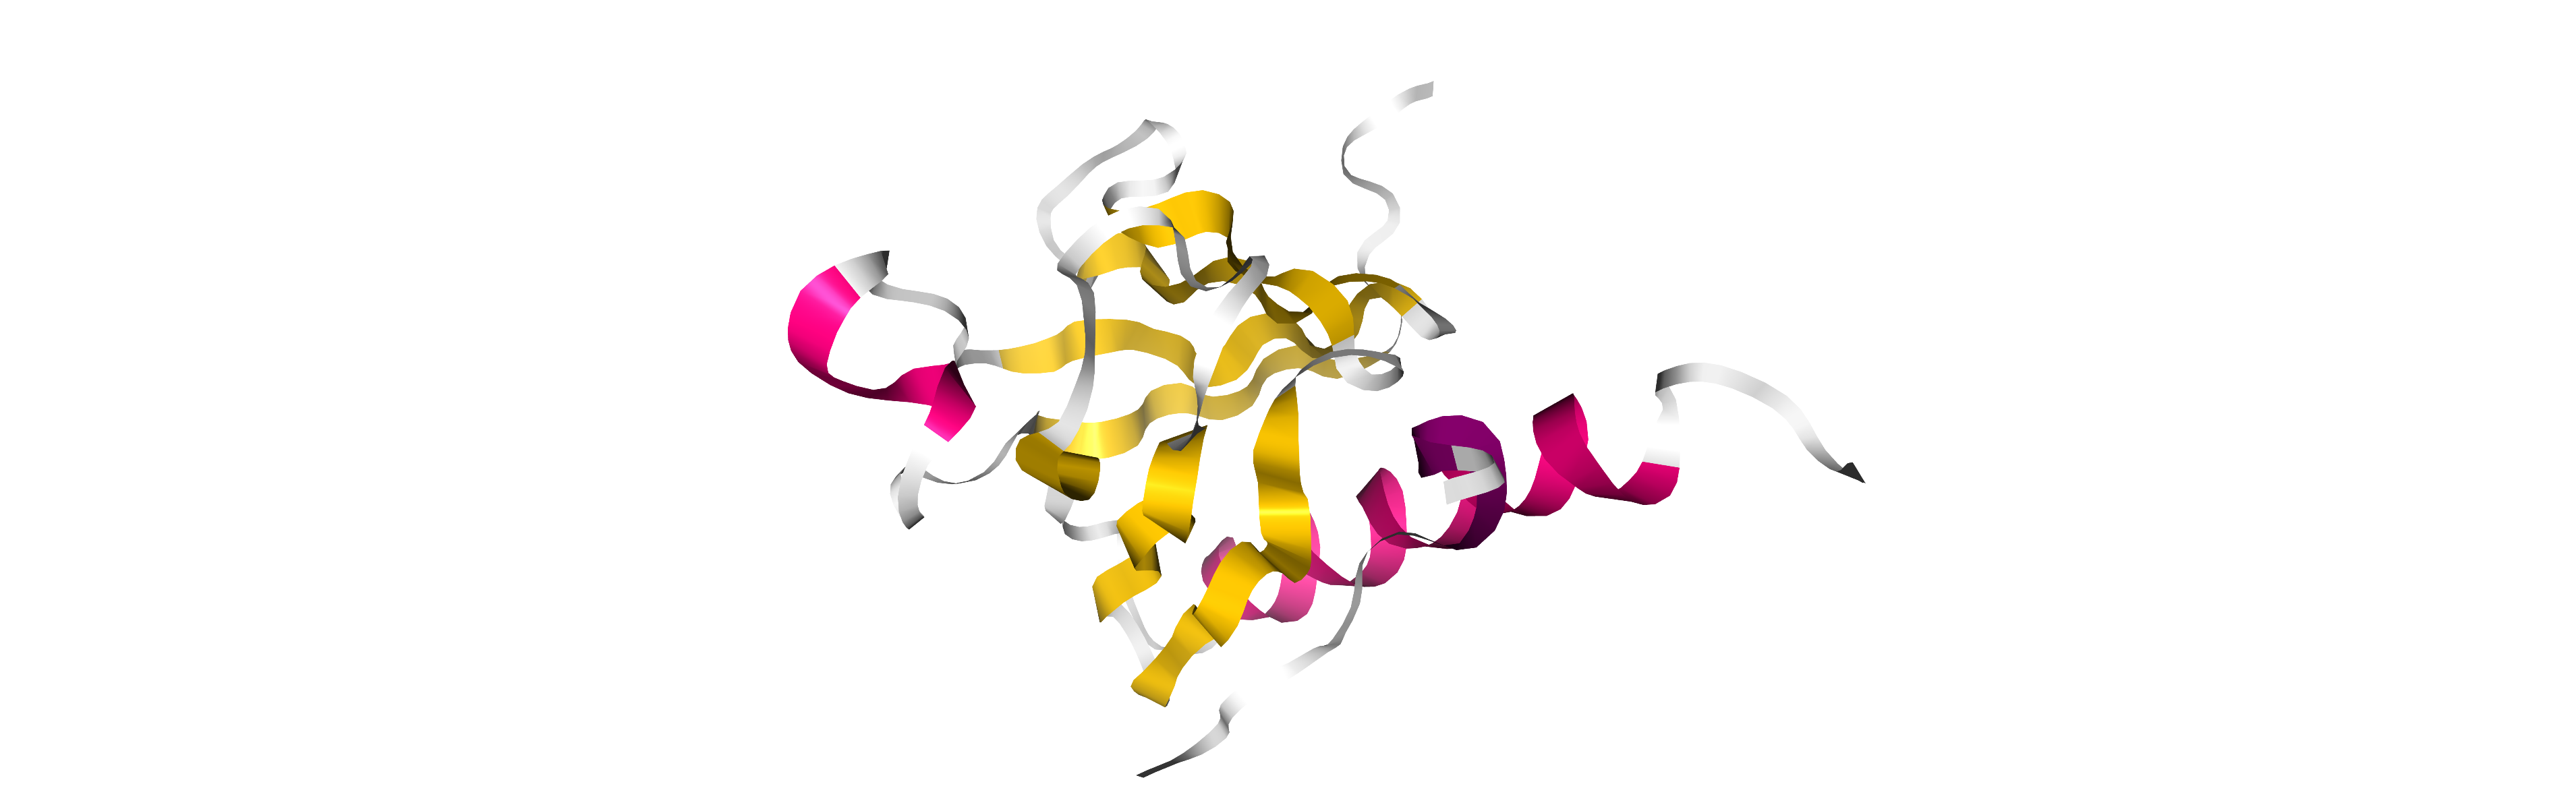

In [26]:
# display saved image
human._display_image()

In [8]:
## repeat these steps for the mouse structure 

mice.clear_representations() # remove all default representation for the structure

#add a ribbon structure with one of the package's availble color scheme
# this specific color scheme highlights different secondary structures
mice.add_ribbon(color_scheme="sstruc")

# this is a code check
mice

NGLWidget()

In [27]:
# save the image exactly as positioned above
mice.render_image()

Image(value=b'', width='99%')

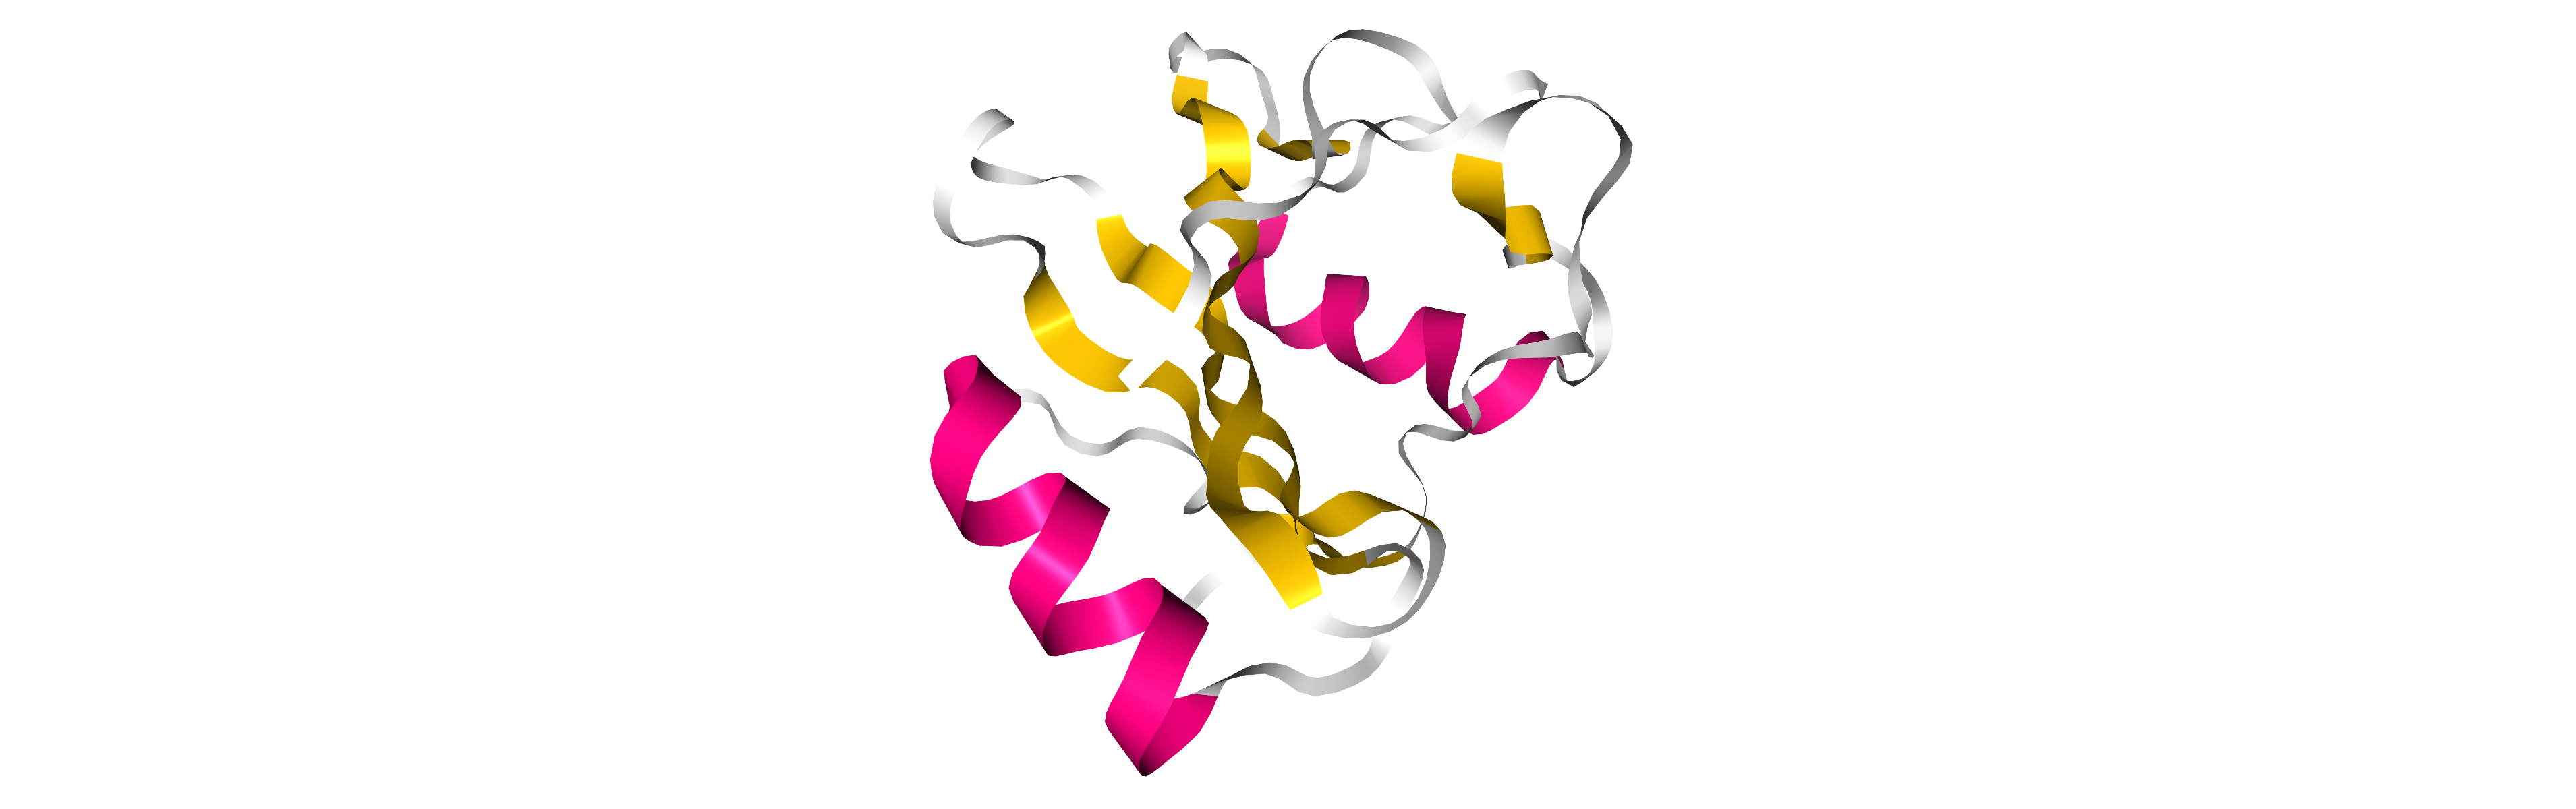

In [28]:
# display saved image
mice._display_image()

### Plotting The Results

#### Heatmap for PSA

To better visualize the results from the PSA, a heatmap of the IRS1 sequence alignment scores will be created. Heatmaps are a type of visual representation for datasets that represent the values through colors. In this case, the heatmap will show the similarity between the IRS1 sequences in humans, mice, rats, and zebrafish. 
The scores from the different alignments will be compiled together into an array and then converted into a dataframe for convenience. Having the scores in this format also makes it easier to plot onto a heatmap. seaborn is used alongside matplotlib to create then display the heatmap. Every sequence is compared with all the other sequences, including itself. The organism related to the IRS1 sequence (mice, human, rat, or zebrafish) is labeled on the x and y axis. 

In [11]:
# Functions for creating numpy array for the heatmap

# this was created so that I could iterate through the arguments in the next user-defined function, 'scores_array()'
def iterate_params(a, b, c, d, e):
    """Return one of the sequences that were given as arguments depending on the value of argument 'e'."""
    if e == 1:
        sequence = a
    elif e == 2:
        sequence = b
    elif e == 3:
        sequence = c
    elif e == 4:
        sequence = d
        
    return sequence

def scores_array(seqA, seqB, seqC, seqD):
    """Return array of alignment scores for the given sequences."""
    #define local variable alignment_scores (empty array)
    alignment_scores = np.array([])
    
    for ref in range(1, 5):
        #define local variable temp_scores_array (empty array)
        temp_scores_array = np.array([])
         # call 'iterate_params()' and assign the value of 'e' to 'ref' so that the next sequence is called whenever the
             # for-loop runs another cycle 
        #define local variable sequence_ref (reference requested sequence output)
        sequence_ref = iterate_params(seqA, seqB, seqC, seqD, ref)
        
        for change in range(1, 5):
            # assign 'e' from 'iterate_params()' to change so that it can iterate over the sequences
            # put it in a nested for-loop so each sequence is compared with all the other sequences
            #define local variable sequence_change (changing requested sequence output)
            sequence_change = iterate_params(seqA, seqB, seqC, seqD, change)
            #define local variable alignment (PSA between two sequences)
            alignment = pairwise2.align.globalxx(sequence_ref, sequence_change) # conduct PSA
            #define local variable temp_scores_array (array of scores)
            temp_scores_array = np.append(temp_scores_array, alignment[0].score) # add alignment scores to list  
        #define local variable alignment_scores  (array of total scores)    
        alignment_scores = np.append(alignment_scores, temp_scores_array) # add all PSA scores against reference sequence to list
        
    return alignment_scores

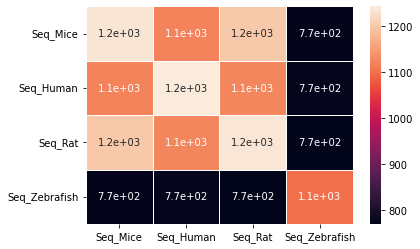

In [12]:
# call the 'scores_array()' function with the mouse, human, rat, and zebrafish sequences as the arguments
# define global variable total_scores_array (array of alignment score)
total_scores_array = scores_array(miceA, humA, ratA, fishA)

# reshape totals_scores_array so that it is a 2D array
# each row and column represent each sequence
# the value represents the alignment score between those two sequences
# define global variable total_scores_array (reshaped array of alignment score)
total_scores_array = total_scores_array.reshape(4, 4)

# # this is a code check; uncomment below
# print(total_scores_array)

# create pandas dataframe from array
# define global variable total_scores_df (dataframe of alignment score)
total_scores_df = pd.DataFrame(total_scores_array) 

# # this is a code check; uncomment below
# print(total_scores_df)

# create heatmap using seaborn
# define global variable labels (list of axis labels )
labels = ["Seq_Mice", "Seq_Human", "Seq_Rat", "Seq_Zebrafish"] 

# make heatmap of the dataframe
# parameters are to specify line thickness, assign labels to the x and y axis, and display the values for each cell
# define global variable ax (heatmap output)
ax = sns.heatmap(total_scores_df, linewidth=0.5, xticklabels=labels, yticklabels=labels, annot=True)
plt.show() # show the heatmap

#### 3D Protein Measurements

To analyze the protein structures that were created, measurements of the 3D proteins will be taken. This will use the Bio.PDB package. The PDB files are loaded into the package and parsed. PDB files are organized in a heirarchical order of Structure>Model>Chain>Residue>Atom, called SMCRA format which allows one to focus on certain sections of the structure for measurements. 

Here, we will be measuring the lengths phosphopeptides and alpha-helices on the human and mouse IRS1 protein. We are comparing phosphopeptides and alpha-helices because they are present on both structures but are different. We will also be measuring the length of the whole structure. These measurements will be compared between the two organisms to see if there are any substantial differences. 

The measurements are taken by examining the protein structures that were previously created and noting the residue ID and atom name for the positions we want to measure from. 

Distances will have to be calculated manually as there is no function -- in this package or any other package -- that automatically calculated. 

##### Human IRS1 Structure 

In [19]:
#parse the pdb files 
# define global variable (parser function)
parser = PDBParser()
# define global variable(human structure)
# define global variable (mice structure)
structureH = parser.get_structure("human", "human.pdb")
structureM = parser.get_structure("mice", "mice.pdb")

In [22]:
# specify which part of the structure will be measured
# define global variables model, chain, and chainB
model = structureH[0] #there is only one model availible so that will be selected
chain = model["A"] # this is the main chain and does not include the phosphopeptide (purple and white ribbon)
chainB = model["B"] # this is the phosphopeptide (purple and white ribbon)

# # distance measurement: length of phosphopeptide
# define global variable res1, res2
res1 = chainB[489] # these are the residues on either end of the phosphopeptide
res2 = chainB[499] # they are called by their residue ID and the chain they are on

# define global variable ca1, ca2
ca1 = res1["CA"] # the calcium atom in the residue is specified by calling the atom's PDB name
ca2 = res2["CA"]# the calcium atom in the residue is specified by calling the atom's PDB name

# define global variable distance_p (calculated distance)
distance_p = ca1 - ca2 # calculate distance
print("Length of phosphopeptide: " + str(distance_p))

# # distance measurement: height of alpha-helix
# define global variable res3, res4
res3 = chain[245] # these are the residues on either end of the alpha helix
res4 = chain[262]

# define global variable ca3, ca4
ca3 = res3["CA"]# the calcium atom in the residue is specified by calling the atom's PDB name
ca4 = res4["CA"] # the calcium atom in the residue is specified by calling the atom's PDB name

# define global variable distance_alpha (calculated distance)
distance_alpha = ca3 - ca4 # calculate distance
print("Height of alpha-helix: " + str(distance_alpha))

# # distance measurement: length of whole structure
# define global variable res5, res6
res5 = chain[177] # these are the residues on farthest ends of the structure
res6 = chain[244]

# define global variable ca5, ca6
ca5 = res5["CA"]# the calcium atom in the residue is specified by calling the atom's PDB name
ca6 = res6["CA"] # the calcium atom in the residue is specified by calling the atom's PDB name

# define global variable distance_whole (calculated distance)
distance_whole = ca5 - ca6 # calculate distance
print("Length of whole structure: " + str(distance_whole))

Length of phosphopeptide: 23.241743
Height of alpha-helix: 25.241243
Length of whole structure: 29.174889


##### Mice IRS1 Structure 

We have to repeat the code used to calculate distance in the human structure for the mice structure because there is no function that does it automatically. This is because every structure is different and distance measurements require the specific atoms to be inputted in order to calculate the distance.

In [23]:
# specify which part of the structure will be measured
# define global variables model, chain, and chainP
model = structureM[0] #there is only one model availible so that will be selected
chain = model["A"] # this is the main chain and does not include the phosphopeptide (purple and white ribbon)
chainP = model["P"] # this is the phosphopeptide (white ribbon)

#distance measurement: length of phosphopeptide
# define global variable res1, res2
res1 = chainP[-2] # these are the residues on either end of the phosphopeptide
res2 = chainP[5] # they are called by their residue ID and the chain they are on

# define global variable ca1, ca2
ca1 = res1["CA"]  # the calcium atom in the residue is specified by calling the atom's PDB name
ca2 = res2["CA"] # the calcium atom in the residue is specified by calling the atom's PDB name

# define global variable distance_whole (calculated distance)
distance_p2 = ca1 - ca2
print("Length of phosphopeptide: " + str(distance_p2))

#distance measurement: height of alpha-helix

# height of first alpha helix
# define global variable res3, res4 # these are the residues on either end of the phosphopeptide
res3 = chain[12]
res4 = chain[23]

# define global variable ca3, ca4
ca3 = res3["CA"] # the calcium atom in the residue is specified by calling the atom's PDB name
ca4 = res4["CA"]# the calcium atom in the residue is specified by calling the atom's PDB name

# height of second alpha helix
# define global variable res3_1, res4_1 # these are the residues on either end of the phosphopeptide
res3_1 = chain[73]
res4_1 = chain[84]

# define global variable ca3_1, ca4_1
ca3_1 = res3_1["CA"] # the calcium atom in the residue is specified by calling the atom's PDB name
ca4_1 = res4_1["CA"]# the calcium atom in the residue is specified by calling the atom's PDB name

# define global variable average_alpha (calculated distance)
average_alpha = ((ca3 - ca4) + (ca3_1 - ca4_1))/2 # calculate average of both alpha-helices
print("Height of alpha-helix: " + str(average_alpha))

#distance measurement: length of whole structure
# define global variable res5, res6 # these are the residues on either end of the phosphopeptide
res5 = chain[18]
res6 = chain[69]

# define global variable ca5, ca6
ca5 = res5["CA"]# the calcium atom in the residue is specified by calling the atom's PDB name
ca6 = res6["CA"]# the calcium atom in the residue is specified by calling the atom's PDB name

# define global variable distance_whole (calculated distance)
distance_whole2 = ca5 - ca6
print("Length of whole structure: " + str(distance_whole2))

Length of phosphopeptide: 21.386553
Height of alpha-helix: 16.424091339111328
Length of whole structure: 30.3463


In [24]:
# calculate differences 

# define global variable p_diff (calculated difference)
p_diff = distance_p - distance_p2 #Difference in length of phosphopeptide
print("Difference in length of phosphopeptide: " + str(p_diff))

# define global variable alpha_diff (calculated difference)
alpha_diff = distance_alpha - average_alpha #Difference in height of alpha-helix
print("Difference in height of alpha-helix: " + str(alpha_diff))

# define global variable structure_diff (calculated difference)
structure_diff = distance_whole - distance_whole2 #Difference in length of whole structure
print("Difference in length of whole structure: " + str(structure_diff))

Difference in length of phosphopeptide: 1.8551903
Difference in height of alpha-helix: 8.81715202331543
Difference in length of whole structure: -1.1714115


### Analyzing the Results 

The heatmap plot shows the similarities in the IRS1 protein sequence between mice, humans, rats, and zebrafish. Higher numbers and lighter colors represent a higher number of matches between the two sequences. The diagonal has the lightest colors for each organism due to self-comparison. The shades differ from organism to organism since not all sequences were the same length. When looking solely at how the human IRS1 sequences compares with other organisms, we see that the alignment score between human IRS1 and zebrafish IRS1 is the lowest, while the score between human IRS1 and rat IRS1 is similar to the score between human IRS1 and mice IRS1. A closer look at the human-rat and human-mice alignment scores shows that the human-rat score is 4 points higher than the human-mice score. The low human-zebrafish alignment score is in line with the hypothesis as zebrafish are not used in research for diabetes type 2. However, mice did not have the highest alignment score with humans, which is not in line with my hypothesis. Furthermore, there is a difference of 123 points between the human-mice score and the human-human score which shows there is a decent amount of difference between the sequences of these two organisms.

The 3D protein structures further highlight the differences between the human IRS1 structure and the mice IRS1 structure. The visualization of the structures with the different secondary structures emphasized showed, at first glance, that the number of alpha-helices, beta sheets, and structure of the phosphopeptide differed between the two organisms. Based on this observation, further analysis into the length of phosphopeptides, height of the alpha helices, and length of the whole structure was conducted and these measurements were compared. The human IRS1 phosphopeptide was 1.86 Å longer, the human IRS1 alpha helix was 8.82 Å longer, and the mice IRS1 structure was 1.17 Å longer. 

Since there was a no strong similarity between human IRS1 sequence and mice IRS1 sequence and there were many differences between human IRS1 structure and mice IRS1 structure, my hypothesis was disproven. IRS1 sequence and structure are not similar between human and mice. 